# Fake_News_Classifier

In [1]:
#importing required libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer,SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import Word2Vec

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#importing dataset
df=pd.read_csv('Fake_News_Data.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


- Classification will be tried by using author and title only.   
- id and text could be dropped.

In [3]:
#dropping id and text columns.
df=df.drop(['id','text'],axis=1)
df.head()

,title,author,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1


In [4]:
#Finding null values
df.isna().sum()

title      558
author    1957
label        0
dtype: int64

In [5]:
df.shape

(20800, 3)

- Replacing author with a dummy values(0) which will be taken care while cleaning text.   
- dropping all the null title value rows.

In [6]:
#dropping rows with titles having null values.
df.author.fillna(str(0),inplace=True)
df.dropna(inplace=True)
df.isna().sum()

title     0
author    0
label     0
dtype: int64

In [7]:
df.shape

(20242, 3)

In [8]:
#Combining title and author
df['author_title']=df.author+' '+df.title
df.head()

,title,author,label,author_title
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,Why the Truth Might Get You Fired,Consortiumnews.com,1,Consortiumnews.com Why the Truth Might Get You...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1,Howard Portnoy Iranian woman jailed for fictio...


Author_title column needs to be cleaned.   
Following steps need to be done:
- Converting text into lowercase.
- Removing punctuations and numbers from the text.
- Splitting sentences into words using word tokenize.
- Removing stopwords from the sentences.
- Stemming words using porterstem and lemmatization

In [9]:
#Initializing stemming functions
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()
stop_words=stopwords.words('english')

In [10]:
#text cleaning function
def clean(x):
    data=x.lower()
    data=re.sub('[^a-zA-Z]',' ',data)
    data=word_tokenize(data)
    data=[word for word in data if word not in stop_words]
    data=[stemmer.stem(word) for word in data]
    data=' '.join(data)
    return(data)

In [11]:
#creating new column with cleaned text
df['cleaned_text']=df.author_title.apply(lambda x:clean(x))
df.head()

,title,author,label,author_title,cleaned_text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,darrel lucu hous dem aid even see comey letter...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...",daniel j flynn flynn hillari clinton big woman...
2,Why the Truth Might Get You Fired,Consortiumnews.com,1,Consortiumnews.com Why the Truth Might Get You...,consortiumnew com truth might get fire
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1,Jessica Purkiss 15 Civilians Killed In Single ...,jessica purkiss civilian kill singl us airstri...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1,Howard Portnoy Iranian woman jailed for fictio...,howard portnoy iranian woman jail fiction unpu...


In [12]:
#creating dependent and independent features.
X=df.cleaned_text
y=df.label

In [13]:
#Splitting test and train data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [14]:
#Shape of data
print('X:',X.shape)
print('y:',y.shape)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X: (20242,)
y: (20242,)
X_train: (16193,)
X_test: (4049,)
y_train: (16193,)
y_test: (4049,)


In [15]:
#Definition of vector convertion function.
cv=CountVectorizer(max_features=5000)
tf=TfidfVectorizer()

In [16]:
#Converting words to vectors
cv.fit(X_train)
X_train=cv.transform(X_train).toarray()
X_test=cv.transform(X_test).toarray()

In [17]:
#Feature names
print(cv.get_feature_names()[0:20])

['aaron', 'ab', 'abandon', 'abba', 'abbi', 'abc', 'abduct', 'abe', 'abedin', 'abelson', 'abl', 'aboard', 'abort', 'abram', 'abroad', 'absolut', 'absurd', 'abus', 'academi', 'accept']


In [18]:
#Result printing function
def result_print(model,X_train,X_test,y_train,y_test):
    y_pred=model.predict(X_train)
    print('train data summary:')
    print('-----------------------------------------------------------')
    print('Accuracy_score:\n',accuracy_score(y_train,y_pred))
    #print('confusion_matrix:\n',confusion_matrix(y_train,y_pred))
    print('confusion_matrix:')
    sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='')
    plt.show()
    print('classification_report:')
    display(pd.DataFrame(classification_report(y_train,y_pred,output_dict=True)))
    
    y_pred=model.predict(X_test)
    print('test data summary:')
    print('-----------------------------------------------------------')
    print('Accuracy_score:\n',accuracy_score(y_test,y_pred))
    #print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))
    print('confusion_matrix:')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='')
    plt.show()
    print('classification_report:')
    display(pd.DataFrame(classification_report(y_test,y_pred,output_dict=True)))

train data summary:
-----------------------------------------------------------
Accuracy_score:
 0.9974680417464337
confusion_matrix:


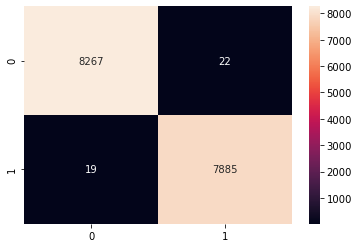

classification_report:


,0,1,accuracy,macro avg,weighted avg
precision,0.997707,0.997218,0.997468,0.997462,0.997468
recall,0.997346,0.997596,0.997468,0.997471,0.997468
f1-score,0.997526,0.997407,0.997468,0.997467,0.997468
support,8289.000000,7904.000000,0.997468,16193.000000,16193.000000


test data summary:
-----------------------------------------------------------
Accuracy_score:
 0.9901210175351939
confusion_matrix:


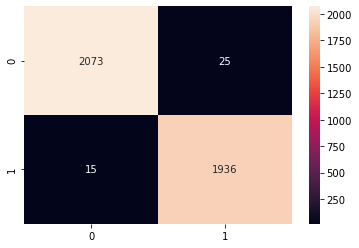

classification_report:


,0,1,accuracy,macro avg,weighted avg
precision,0.992816,0.987251,0.990121,0.990034,0.990135
recall,0.988084,0.992312,0.990121,0.990198,0.990121
f1-score,0.990444,0.989775,0.990121,0.990110,0.990122
support,2098.000000,1951.000000,0.990121,4049.000000,4049.000000


In [19]:
#Model building - LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model=LogisticRegression()
model.fit(X_train,y_train)
result_print(model,X_train,X_test,y_train,y_test)

Inference:
- Using CountVectorizer with max_features 5000 LogisticRegression model is built.
- A good accuracy with good precision and recall is achieved. 